Fashion mnist를 이용한 신경말 모델 훈련 예제

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


이미지 출력을 위한 변수 생성

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

In [4]:
print("train images 크기", train_images.shape)
print("test images 크기", test_images.shape)
print("train labels 길이", train_labels)

train images 크기 (60000, 28, 28)
test images 크기 (10000, 28, 28)
train labels 길이 [9 0 0 ... 3 0 5]


## 데이터 전처리
픽셀 값의 범위가 0 ~ 255 사이라는 것을 확인할 수 있음

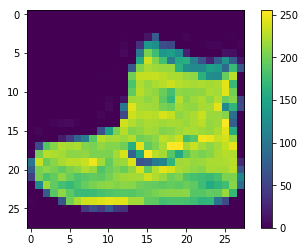

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

신경망 범위 조정

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

훈련 세트에서 처음 25개의 이미지와 클래스 이름 출력

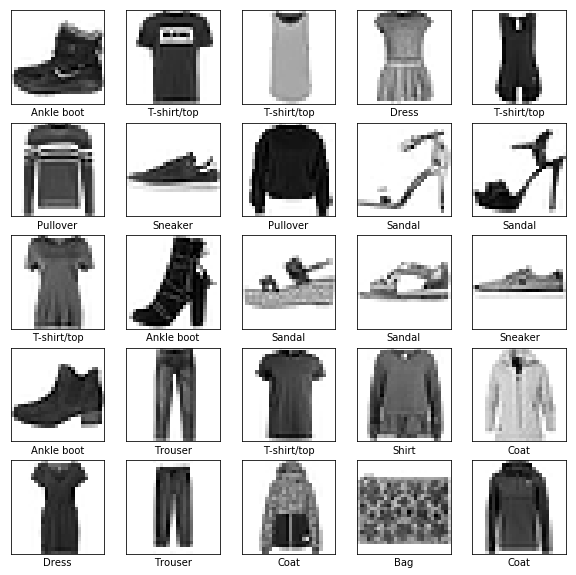

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성
모델 층을 구성한 다음 모델 컴파일
### 층 설정

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # 첫 번째 층을 28 * 28 = 284로 변환
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 모델 훈련

In [12]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.5012 - accuracy: 0.8231
Epoch 2/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3732 - accuracy: 0.8642
Epoch 3/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3350 - accuracy: 0.8772
Epoch 4/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3108 - accuracy: 0.8856
Epoch 5/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2934 - accuracy: 0.8904


## 정확도 평가

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/1 - 0s - loss: 0.3112 - accuracy: 0.8706

테스트 정확도: 0.8706


테스트 데이터셋에 대한 정확도가 훈련 세트 정확도보다 낮음 => overfitting 때문

## 예측 만들기

In [19]:
predictions = model.predict(test_images)
print(predictions[0])

[1.0924259e-06 4.8230550e-07 3.0943156e-07 8.5411322e-08 1.8300153e-06
 5.8069075e-03 1.4971968e-05 8.7651173e-03 5.2160809e-05 9.8535711e-01]


10개의 숫자 중 가장 큰 값이 모델을 나타내게 된다.

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img): 
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

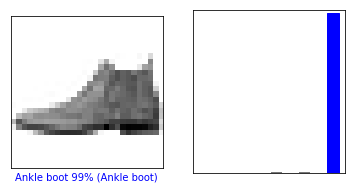

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

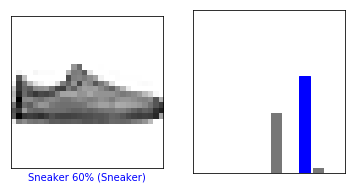

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

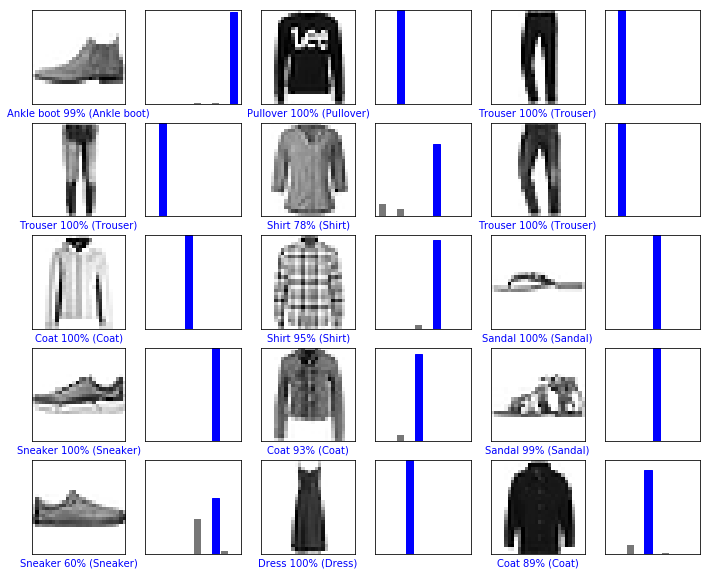

In [25]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [26]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


In [27]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [28]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.0924259e-06 4.8230550e-07 3.0943124e-07 8.5411493e-08 1.8300171e-06
  5.8069075e-03 1.4971968e-05 8.7651173e-03 5.2160860e-05 9.8535711e-01]]


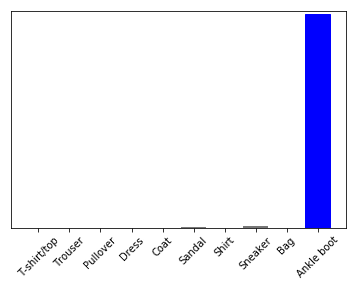

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [30]:
# 예측 이미지
np.argmax(predictions_single[0])

9